In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
file = pd.read_csv('Titanic-Dataset.csv')
print(file.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [21]:
print(file.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [22]:
print(file.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [23]:
file = file.drop('Cabin', axis=1)

In [12]:
print(file.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64


In [24]:
avg_age = file['Age'].mean()
file['Age'] = file["Age"].fillna(avg_age)

In [14]:
print(file.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


In [25]:
file = file.dropna(subset=['Embarked'])

In [26]:
print(file.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [27]:
survival_rate_by_gender = file.groupby('Sex')['Survived'].mean()
print(survival_rate_by_gender)

Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64


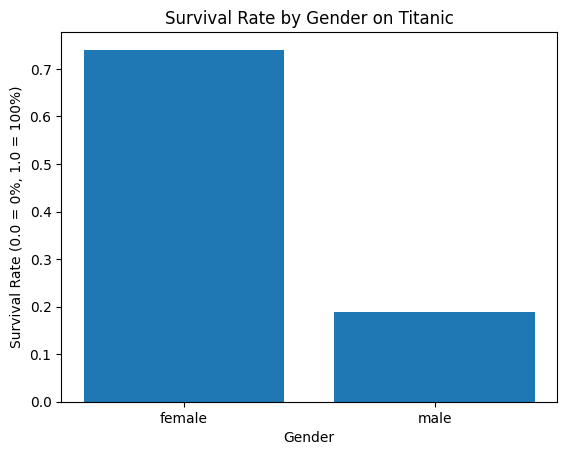

In [28]:
plt.bar(survival_rate_by_gender.index, survival_rate_by_gender.values)
plt.title('Survival Rate by Gender on Titanic')
plt.xlabel('Gender')
plt.ylabel('Survival Rate (0.0 = 0%, 1.0 = 100%)')
plt.show()

In [29]:
survival_rate_by_class = file.groupby('Pclass')['Survived'].mean()
print(survival_rate_by_class)

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64


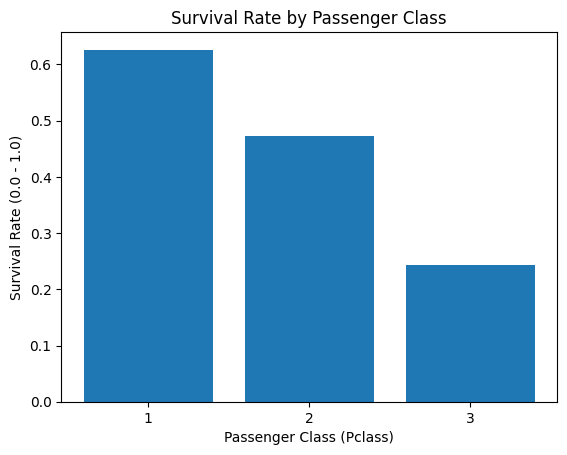

In [30]:
plt.bar(survival_rate_by_class.index, survival_rate_by_class.values)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Survival Rate (0.0 - 1.0)')
plt.xticks([1, 2, 3]) 
plt.show()

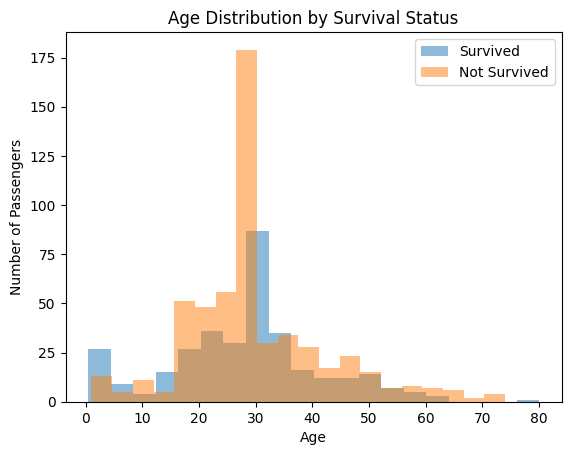

In [31]:
survived_ages = file[file['Survived'] == 1]['Age']
not_survived_ages = file[file['Survived'] == 0]['Age']

plt.hist(survived_ages, bins=20, alpha=0.5, label='Survived')
plt.hist(not_survived_ages, bins=20, alpha=0.5, label='Not Survived')

plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')

plt.legend()

plt.show()